In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path_link = "/content/drive/MyDrive/users.dat"
users = pd.read_csv(path_link,delimiter='::')
users.columns

path_link = "/content/drive/MyDrive/movies.dat"
movies = pd.read_csv(path_link,delimiter='::')
movies.columns

path_link = "/content/drive/MyDrive/ratings.dat"
ratings = pd.read_csv(path_link,delimiter='::')
ratings.columns

<ipython-input-2-895e62d4ce1e>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv(path_link,delimiter='::')
<ipython-input-2-895e62d4ce1e>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(path_link,delimiter='::')
<ipython-input-2-895e62d4ce1e>:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(path_link,delimiter='::')


Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

**Data Preprocessing**

In [3]:
#Merging Movies and Ratings dataset on MovieID column
merged_ratings=ratings.merge(movies,on="MovieID")
merged_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
Title        0
Genres       0
dtype: int64

In [4]:
ratings_count_per_user = merged_ratings.groupby('UserID')['Rating'].count().reset_index(name='ratings_count')
print(ratings_count_per_user)


      UserID  ratings_count
0          1             53
1          2            129
2          3             51
3          4             21
4          5            198
...      ...            ...
6035    6036            888
6036    6037            202
6037    6038             20
6038    6039            123
6039    6040            341

[6040 rows x 2 columns]


In [5]:
# Selecting users who have rated atleast 235 movies
x=merged_ratings.groupby('UserID').count()['Rating']>=235
filtered_user=x[x].index

In [6]:
# consider users with atleast 235 ratings
filtered_ratings=merged_ratings[merged_ratings['UserID'].isin(filtered_user)]
filtered_ratings

,UserID,MovieID,Rating,Timestamp,Title,Genres
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama
14,48,1193,4,977975061,One Flew Over the Cuckoo's Nest (1975),Drama
16,53,1193,5,977946400,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000194,5795,591,1,958145253,Tough and Deadly (1995),Action|Drama|Thriller
1000201,5433,286,3,960240881,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000203,5556,2198,3,959445515,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama


In [7]:
y=filtered_ratings.groupby('Title').count()['Rating']>=1
famous_movie=y[y].index

In [8]:

final_ratings=filtered_ratings[filtered_ratings['Title'].isin(famous_movie)]
final_ratings

,UserID,MovieID,Rating,Timestamp,Title,Genres
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama
14,48,1193,4,977975061,One Flew Over the Cuckoo's Nest (1975),Drama
16,53,1193,5,977946400,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000194,5795,591,1,958145253,Tough and Deadly (1995),Action|Drama|Thriller
1000201,5433,286,3,960240881,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000203,5556,2198,3,959445515,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama


In [9]:
#Creating pivot table
pt=final_ratings.pivot_table(index='UserID',columns='Title',values='Rating')
pt=pt.fillna(0)
pt

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0
6025,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1.Cosine Similarity**

In [10]:
#Function to calculate cosine similarity

def cosine_similarity(user1, user2):
    # Find non-zero indices for user1 and user2
    non_zero_indices_user1 = np.where(user1 != 0)[0]
    non_zero_indices_user2 = np.where(user2 != 0)[0]

    # Find common movies using NumPy's intersect1d
    common_movies = np.intersect1d(non_zero_indices_user1, non_zero_indices_user2)
    if len(common_movies) == 0:
        return 0  # No common movies, similarity is 0

    # Initialize dot product and norms
    dot_product = 0
    norm_user1 = 0
    norm_user2 = 0

    # Iterate over common movies
    for movie in common_movies:
        # Calculate dot product
        dot_product += user1[movie] * user2[movie]
        # Calculate norms
        norm_user1 += user1[movie] ** 2
        norm_user2 += user2[movie] ** 2

    # Take square root to get the final norms
    norm_user1 = np.sqrt(norm_user1)
    norm_user2 = np.sqrt(norm_user2)

    # Calculate cosine similarity
    similarity = dot_product / (norm_user1 * norm_user2)
    return similarity



In [11]:
pt_np = pt.to_numpy()
num_users = pt_np.shape[0]  # Number of users in the matrix
similarity_matrix = np.full((num_users, num_users), -1.0)

for i in range(num_users):
    print(i)
    user1 = pt_np[i, :]
    for j in range(num_users):
      user2 = pt_np[j, :]
      if similarity_matrix[i, j] == -1:
        sim = cosine_similarity(user1, user2)
        #print(sim)
        similarity_matrix[i, j] = sim
        similarity_matrix[j, i] = sim


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
import pickle

similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_cosine_zero.pkl'

# Save the similarity matrix to a file using pickle
with open(similarity_matrix_file, 'wb') as f:
    pickle.dump(similarity_matrix, f)

print(f"Similarity matrix saved to {similarity_matrix_file}")

Similarity matrix saved to /content/drive/MyDrive/user_similarity_matrix_cosine_zero.pkl


In [13]:
import pickle

# Define the path for the input file
similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_cosine_zero.pkl'

# Load the similarity matrix from the file using pickle
with open(similarity_matrix_file, 'rb') as f:
    similarity_matrix = pickle.load(f)

In [14]:
similarity_matrix

array([[1.        , 0.96800941, 0.95934923, ..., 0.92187842, 0.94887099,
        0.9374928 ],
       [0.96800941, 1.        , 0.95381012, ..., 0.92175699, 0.95061471,
        0.93543699],
       [0.95934923, 0.95381012, 1.        , ..., 0.91945243, 0.94056695,
        0.94146298],
       ...,
       [0.92187842, 0.92175699, 0.91945243, ..., 1.        , 0.90255269,
        0.93120279],
       [0.94887099, 0.95061471, 0.94056695, ..., 0.90255269, 1.        ,
        0.96229638],
       [0.9374928 , 0.93543699, 0.94146298, ..., 0.93120279, 0.96229638,
        1.        ]])

In [66]:
import numpy as np

# Define manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Define collaborative filtering function to generate ratings for the test set
def collaborative_filtering(train_pt, similarity_matrix):
    # Generate ratings for the test set based on train set ratings and similarity matrix
    predicted_ratings = np.zeros_like(test_pt.values)
    for i, user_ratings in enumerate(test_pt.values):

        for j, rating in enumerate(user_ratings):
            if not np.isnan(rating):
                sim_sum = 0
                weighted_sum = 0
                for k, train_ratings in enumerate(train_pt.values):
                    if not np.isnan(train_ratings[j]):
                        weighted_sum += similarity_matrix[i, k] * train_ratings[j]
                        sim_sum += abs(similarity_matrix[i, k])
                if sim_sum != 0:
                    predicted_ratings[i, j] = weighted_sum / sim_sum

    return predicted_ratings

# Define function to calculate evaluation metrics (MSE, RMSE, F1)
def evaluate_recommendations(actual_ratings, predicted_ratings):
    absolute_error=np.abs(actual_ratings-predicted_ratings)
    squared_errors = (actual_ratings - predicted_ratings) ** 2
    mse = np.nanmean(squared_errors)
    rmse = np.sqrt(mse)
    mae=np.mean(absolute_error)

    return mse, rmse ,mae



# Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)

# Call collaborative filtering function to generate ratings for the test set
predicted_ratings = collaborative_filtering(train_pt, similarity_matrix)

# Get actual ratings from the test set
actual_ratings = test_pt.values

# Evaluate the recommendation system on the test set
mse, rmse,mae= evaluate_recommendations(actual_ratings, predicted_ratings)

# Print evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")



MSE: 1.1038452760430966
RMSE: 1.0506404123405384
MAE: 0.5868789275058213


In [17]:
num_movies = int(input("Enter the number of movies you want to rate: "))
movie_names = []
user_ratings = []

for i in range(num_movies):
    movie_name = input(f"Enter the name of movie {i+1}: ").strip()
    rating = int(input(f"Enter your rating (from 1 to 5) for {movie_name}: "))
    movie_names.append(movie_name)
    user_ratings.append(rating)

Enter the number of movies you want to rate: 3
Enter the name of movie 1: 12 Angry Men (1957)
Enter your rating (from 1 to 5) for 12 Angry Men (1957): 4
Enter the name of movie 2: 13th Warrior, The (1999)
Enter your rating (from 1 to 5) for 13th Warrior, The (1999): 2
Enter the name of movie 3: 101 Dalmatians (1961)
Enter your rating (from 1 to 5) for 101 Dalmatians (1961): 3


In [37]:

import numpy as np


# Assuming pt is your existing user-movie matrix and user_ratings, movie_names are provided
new_user_ratings = np.zeros(len(pt.columns))

# Update new user ratings with provided ratings
for movie_name, rating in zip(movie_names, user_ratings):
    index = pt.columns.get_loc(movie_name)
    new_user_ratings[index] = rating

# Reshape new user ratings to a 2D array
new_user_ratings = new_user_ratings.reshape(1, -1)

# Calculate mean rating for the new user
new_user_mean = np.mean(user_ratings)

# Initialize lists to store predicted ratings and similar users along with their ratings
predicted_ratings = []
similar_users = []

# Calculate similarity between new user and each existing user in pt
for i in range(len(pt)):
    similarity = cosine_similarity(new_user_ratings.reshape(-1), pt.iloc[i, :].values)
    if np.sum(np.abs(similarity)) != 0:
        user_means = np.mean(pt.iloc[i, :].values)
        # Subtract user mean from ratings
        adjusted_ratings = np.subtract(pt.iloc[i, :].values, user_means)
        predicted_rating = np.sum(np.multiply(similarity, adjusted_ratings)) / np.sum(np.abs(similarity))
        # Add new user mean to predicted rating
        predicted_rating += new_user_mean
        predicted_ratings.append(predicted_rating)
        similar_users.append((i, similarity))

# Recommend top 5 movies
predicted_ratings = np.array(predicted_ratings)
top_indices = np.argsort(predicted_ratings)[::-1][:5]

# Print top 5 recommended movies
print("Top 5 recommended movies:")
for idx in top_indices:
    print(f"Movie Title: {pt.columns[idx]} , Predicted Ratings: {predicted_ratings[idx]}")

# Show top 5 similar users and their corresponding ratings for each movie rated by the new user
print("\nTop 5 similar users and their ratings for the movies rated by the new user:")
similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)

for user_index, sim in similar_users[:6]:
    print(f"User no: {user_index}")
    print("Movie Ratings:")
    for movie_name, rating in zip(movie_names, pt.iloc[user_index, pt.columns.isin(movie_names)]):
        print(f"{movie_name}: {rating}")


Top 5 recommended movies:
Movie Title: Amityville: A New Generation (1993) , Predicted Ratings: 3.0000000000006537
Movie Title: Bless the Child (2000) , Predicted Ratings: 3.000000000000593
Movie Title: Bird on a Wire (1990) , Predicted Ratings: 3.0000000000005778
Movie Title: Butcher's Wife, The (1991) , Predicted Ratings: 3.0000000000005755
Movie Title: Beavis and Butt-head Do America (1996) , Predicted Ratings: 3.00000000000054

Top 5 similar users and their ratings for the movies rated by the new user:
User no: 223
Movie Ratings:
12 Angry Men (1957): 3.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 2.0
User no: 473
Movie Ratings:
12 Angry Men (1957): 3.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 2.0
User no: 565
Movie Ratings:
12 Angry Men (1957): 3.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 2.0
User no: 688
Movie Ratings:
12 Angry Men (1957): 3.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 2.0
User no: 874
Movie Ratings:
12 Angry Men (1957):

In [36]:
import numpy as np

# Manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Function to calculate mean squared error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    n = len(actual_ratings)
    squared_errors = [(actual_ratings[i] - predicted_ratings[i])**2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

# Function to calculate root mean squared error (RMSE)
def calculate_rmse(mse):
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate F1 Score
def calculate_f1(actual_ratings, predicted_ratings):
    tp = fp = fn = 0
    for actual, predicted in zip(actual_ratings, predicted_ratings):
        if actual > 0 and predicted > 0:
            tp += 1
        elif actual == 0 and predicted > 0:
            fp += 1
        elif actual > 0 and predicted == 0:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score



def evaluate_recommendations(test_pt, predicted_ratings, movie_names):
    actual_ratings = []
    predicted_ratings_list = []

    # Iterate over the movie names
    for movie_name in movie_names:
        # Calculate the mean rating for the current movie in test_pt
        mean_rating = np.mean(test_pt[movie_name])
        # Append the mean rating to actual_ratings
        actual_ratings.append(mean_rating)

        # Get the predicted rating for the current movie
        predicted_rating = predicted_ratings[movie_names.index(movie_name)]
        # Append the predicted rating to predicted_ratings_list
        predicted_ratings_list.append(predicted_rating)

    # Calculate evaluation metrics
    mse = calculate_mse(actual_ratings, predicted_ratings_list)
    rmse = calculate_rmse(mse)
    f1_score = calculate_f1(actual_ratings, predicted_ratings)



    return mse, rmse,f1_score





 # Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)


 # Evaluate the recommendation system on the test set
mse_test_cosine, rmse_test_cosine ,f1_score_test_cosine= evaluate_recommendations(pt, predicted_ratings,movie_names)

 # Print the evaluation results
print(f"Mean Squared Error (MSE) on the test set: {mse_test_cosine}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse_test_cosine}")
print(f"F1 score on the test set: {f1_score_test_cosine}")





Mean Squared Error (MSE) on the test set: 4.2235286345618475
Root Mean Squared Error (RMSE) on the test set: 2.0551225351695814
F1 score on the test set: 1.0


**2.Pearson Corelation:**

In [46]:
import numpy as np

def pearson_correlation(user1, user2):
    # Initialize variables to store the sum of products, sum of squares, and count of common movies
    sum_product = 0
    sum_user1_sq = 0
    sum_user2_sq = 0
    common_count = 0

    # Calculate mean ratings for each user
    mean_user1 = np.mean(user1[user1 != 0])
    mean_user2 = np.mean(user2[user2 != 0])

    # Find common movies
    non_zero_indices_user1 = np.where(user1 != 0)[0]
    non_zero_indices_user2 = np.where(user2 != 0)[0]
    common_movies = np.intersect1d(non_zero_indices_user1, non_zero_indices_user2)

    if len(common_movies) == 0:
        return 0  # No common movies, similarity is 0

    # Iterate over common movies
    for movie_idx in common_movies:
        # Adjust ratings for the current movie
        user1_adjusted = user1[movie_idx] - mean_user1
        user2_adjusted = user2[movie_idx] - mean_user2

        # Update sum of products and sums of squares
        sum_product += user1_adjusted * user2_adjusted
        sum_user1_sq += user1_adjusted ** 2
        sum_user2_sq += user2_adjusted ** 2
        common_count += 1

    # Calculate Pearson correlation coefficient
    if common_count == 0:
        return 0  # Avoid division by zero

    norm_user1 = np.sqrt(sum_user1_sq)
    norm_user2 = np.sqrt(sum_user2_sq)
    if(norm_user1 * norm_user2)!=0:
      similarity = sum_product / (norm_user1 * norm_user2)
    else:
      similarity=0

    return similarity


In [39]:
#Calculate pearson coefficient between every pair of users
pt_np = pt.to_numpy()
num_users = pt_np.shape[0]  # Number of users in the matrix
similarity_matrix_pearson = np.full((num_users, num_users), -2.0)

for i in range(num_users):
    print(i)
    user1 = pt_np[i, :]
    for j in range(num_users):
      user2 = pt_np[j, :]
      if similarity_matrix_pearson[i, j] == -2:
        sim = pearson_correlation(user1, user2)
        #print(sim)
        similarity_matrix_pearson[i, j] = sim
        similarity_matrix_pearson[j, i] = sim


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
import pickle

similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_pearson_zero.pkl'

# Save the similarity matrix to a file using pickle
with open(similarity_matrix_file, 'wb') as f:
    pickle.dump(similarity_matrix_pearson, f)

print(f"Similarity matrix saved to {similarity_matrix_file}")

Similarity matrix saved to /content/drive/MyDrive/user_similarity_matrix_pearson_zero.pkl


In [41]:
import pickle

# Define the path for the input file
similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_pearson_zero.pkl'

# Load the similarity matrix from the file using pickle
with open(similarity_matrix_file, 'rb') as f:
    similarity_matrix_pearson = pickle.load(f)

In [42]:
similarity_matrix_pearson

array([[ 1.        ,  0.27710765,  0.04356262, ...,  0.30692324,
         0.09037615, -0.04727804],
       [ 0.27710765,  1.        ,  0.30271864, ...,  0.51184983,
         0.4022919 ,  0.11201863],
       [ 0.04356262,  0.30271864,  1.        , ...,  0.28560363,
         0.29056034,  0.0167124 ],
       ...,
       [ 0.30692324,  0.51184983,  0.28560363, ...,  1.        ,
         0.28656978, -0.06833396],
       [ 0.09037615,  0.4022919 ,  0.29056034, ...,  0.28656978,
         1.        ,  0.34956714],
       [-0.04727804,  0.11201863,  0.0167124 , ..., -0.06833396,
         0.34956714,  1.        ]])

In [43]:
import numpy as np

# Define manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Define collaborative filtering function to generate ratings for the test set
def collaborative_filtering(train_pt, similarity_matrix):

    # Generate ratings for the test set based on train set ratings and similarity matrix
    predicted_ratings = np.zeros_like(test_pt.values)
    train_user_means = np.nanmean(train_pt, axis=1)


    test_user_means = np.nanmean(test_pt, axis=1)

    for i, user_ratings in enumerate(test_pt.values):

        user_mean =test_user_means[i]
        for j, rating in enumerate(user_ratings):
            if not np.isnan(rating):
                sim_sum = 0
                weighted_sum = 0
                for k, train_ratings in enumerate(train_pt.values):
                    if not np.isnan(train_ratings[j]):
                        train_user_mean = train_user_means[k]
                        # Subtract the user mean for user k and add the user mean for user i
                        adjusted_rating = train_ratings[j] - train_user_mean
                        weighted_sum += similarity_matrix[i, k] * adjusted_rating
                        sim_sum += abs(similarity_matrix[i, k])
                if sim_sum != 0:
                    predicted_ratings[i, j] = (weighted_sum / sim_sum) + user_mean

    return predicted_ratings

# Define function to calculate evaluation metrics (MSE, RMSE, F1)
def evaluate_recommendations(actual_ratings, predicted_ratings):
    absolute_error=np.abs(actual_ratings-predicted_ratings)
    squared_errors = (actual_ratings - predicted_ratings) ** 2
    mse = np.nanmean(squared_errors)
    rmse = np.sqrt(mse)
    mae=np.nanmean(absolute_error)

    return mse, rmse ,mae



# Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)

# Call collaborative filtering function to generate ratings for the test set
predicted_ratings = collaborative_filtering(train_pt, similarity_matrix_pearson)

# Get actual ratings from the test set
actual_ratings = test_pt.values

# Evaluate the recommendation system on the test set
pearson_mse, pearson_rmse,pearson_mae= evaluate_recommendations(actual_ratings, predicted_ratings)

# Print evaluation metrics
print(f"MSE: {pearson_mse}")
print(f"RMSE: {pearson_rmse}")
print(f"MAE: {pearson_mae}")


MSE: 1.0862529290704064
RMSE: 1.0422345844724241
MAE: 0.5963578548225084


In [44]:
num_movies = int(input("Enter the number of movies you want to rate: "))
movie_names = []
user_ratings = []

for i in range(num_movies):
    movie_name = input(f"Enter the name of movie {i+1}: ").strip()
    rating = int(input(f"Enter your rating (from 1 to 5) for {movie_name}: "))
    movie_names.append(movie_name)
    user_ratings.append(rating)


Enter the number of movies you want to rate: 3
Enter the name of movie 1: 12 Angry Men (1957)
Enter your rating (from 1 to 5) for 12 Angry Men (1957): 4
Enter the name of movie 2: 13th Warrior, The (1999)
Enter your rating (from 1 to 5) for 13th Warrior, The (1999): 2
Enter the name of movie 3: 101 Dalmatians (1961)
Enter your rating (from 1 to 5) for 101 Dalmatians (1961): 3


In [47]:

import numpy as np


# Assuming pt is your existing user-movie matrix and user_ratings, movie_names are provided
new_user_ratings = np.zeros(len(pt.columns))

# Update new user ratings with provided ratings
for movie_name, rating in zip(movie_names, user_ratings):
    index = pt.columns.get_loc(movie_name)
    new_user_ratings[index] = rating

# Reshape new user ratings to a 2D array
new_user_ratings = new_user_ratings.reshape(1, -1)

# Calculate mean rating for the new user
new_user_mean = np.mean(user_ratings)

# Initialize lists to store predicted ratings and similar users along with their ratings
predicted_ratings = []
similar_users = []

# Calculate similarity between new user and each existing user in pt
for i in range(len(pt)):
    similarity = pearson_correlation(new_user_ratings.reshape(-1), pt.iloc[i, :].values)
    if np.sum(np.abs(similarity)) != 0:
        user_means = np.mean(pt.iloc[i, :].values)
        # Subtract user mean from ratings
        adjusted_ratings = np.subtract(pt.iloc[i, :].values, user_means)
        predicted_rating = np.sum(np.multiply(similarity, adjusted_ratings)) / np.sum(np.abs(similarity))
        # Add new user mean to predicted rating
        predicted_rating += new_user_mean
        predicted_ratings.append(predicted_rating)
        similar_users.append((i, similarity))

# Recommend top 5 movies
predicted_ratings = np.array(predicted_ratings)
top_indices = np.argsort(predicted_ratings)[::-1][:5]

# Print top 5 recommended movies
print("Top 5 recommended movies:")
for idx in top_indices:
    print(f"Movie Title: {pt.columns[idx]} , Predicted Ratings: {predicted_ratings[idx]}")

# Show top 5 similar users and their corresponding ratings for each movie rated by the new user
print("\nTop 5 similar users and their ratings for the movies rated by the new user:")
similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)

for user_index, sim in similar_users[:6]:
    print(f"User no: {user_index}")
    print("Movie Ratings:")
    for movie_name, rating in zip(movie_names, pt.iloc[user_index, pt.columns.isin(movie_names)]):
        print(f"{movie_name}: {rating}")


Top 5 recommended movies:
Movie Title: Bossa Nova (1999) , Predicted Ratings: 3.0000000000006684
Movie Title: Amazing Panda Adventure, The (1995) , Predicted Ratings: 3.0000000000006537
Movie Title: Blue Angel, The (Blaue Engel, Der) (1930) , Predicted Ratings: 3.0000000000005755
Movie Title: Auntie Mame (1958) , Predicted Ratings: 3.000000000000547
Movie Title: Bad Company (1995) , Predicted Ratings: 3.00000000000054

Top 5 similar users and their ratings for the movies rated by the new user:
User no: 3
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 3.0
User no: 12
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 16
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 17
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 25
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, 

In [48]:
import numpy as np

# Manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Function to calculate mean squared error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    n = len(actual_ratings)
    squared_errors = [(actual_ratings[i] - predicted_ratings[i])**2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

# Function to calculate root mean squared error (RMSE)
def calculate_rmse(mse):
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate F1 Score
def calculate_f1(actual_ratings, predicted_ratings):
    tp = fp = fn = 0
    for actual, predicted in zip(actual_ratings, predicted_ratings):
        if actual > 0 and predicted > 0:
            tp += 1
        elif actual == 0 and predicted > 0:
            fp += 1
        elif actual > 0 and predicted == 0:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score



def evaluate_recommendations(test_pt, predicted_ratings, movie_names):
    actual_ratings = []
    predicted_ratings_list = []

    # Iterate over the movie names
    for movie_name in movie_names:
        # Calculate the mean rating for the current movie in test_pt
        mean_rating = np.mean(test_pt[movie_name])
        # Append the mean rating to actual_ratings
        actual_ratings.append(mean_rating)

        # Get the predicted rating for the current movie
        predicted_rating = predicted_ratings[movie_names.index(movie_name)]
        # Append the predicted rating to predicted_ratings_list
        predicted_ratings_list.append(predicted_rating)

    # Calculate evaluation metrics
    mse = calculate_mse(actual_ratings, predicted_ratings_list)
    rmse = calculate_rmse(mse)
    f1_score = calculate_f1(actual_ratings, predicted_ratings)



    return mse, rmse,f1_score





 # Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)


 # Evaluate the recommendation system on the test set
mse_test_pearson, rmse_test_pearson ,f1_score_test_pearson= evaluate_recommendations(pt, predicted_ratings,movie_names)

 # Print the evaluation results
print(f"Mean Squared Error (MSE) on the test set: {mse_test_pearson}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse_test_pearson}")
print(f"F1 score on the test set: {f1_score_test_pearson}")





Mean Squared Error (MSE) on the test set: 4.22352863456245
Root Mean Squared Error (RMSE) on the test set: 2.055122535169728
F1 score on the test set: 1.0


**3.Weighted Pearson:**

In [49]:
import pandas as pd
import numpy as np

# Assuming 'pt' is your pivot table with movie title in columns and userid as index, and rating as values

# Initialize an empty dictionary to store weights
weights = {}

# Calculate the total number of users
total_users = len(pt.index)

# Iterate over each column (movie) in the pivot table
for movie_title in pt:
    # Count the number of users who rated the movie
    users_rated_movie = (pt[movie_title] != 0).sum()

    # Calculate the weight of the movie
    weight = np.log(total_users / users_rated_movie)

    # Store the weight in the weights dictionary with movie title as the key
    weights[movie_title] = weight

# Convert the weights dictionary to a pandas Series
weights_series = pd.Series(weights)

print(weights_series)


$1,000,000 Duck (1971)                        3.739205
'Night Mother (1986)                          3.301991
'Til There Was You (1997)                     3.562274
'burbs, The (1989)                            1.730774
...And Justice for All (1979)                 2.336910
                                                ...   
Zed & Two Noughts, A (1985)                   4.037698
Zero Effect (1998)                            1.739470
Zero Kelvin (Kj rlighetens kj tere) (1995)    7.173192
Zeus and Roxanne (1997)                       4.400603
eXistenZ (1999)                               1.748242
Length: 3655, dtype: float64


In [50]:
import numpy as np

def wtpearson_correlation(user1, user2):
    # Initialize variables to store the sum of products, sum of squares, and count of common movies
    sum_product = 0
    sum_user1_sq = 0
    sum_user2_sq = 0
    common_count = 0

    # Calculate mean ratings for each user
    mean_user1 = np.mean(user1[user1 != 0])
    mean_user2 = np.mean(user2[user2 != 0])

    # Find common movies
    non_zero_indices_user1 = np.where(user1 != 0)[0]
    non_zero_indices_user2 = np.where(user2 != 0)[0]
    common_movies = np.intersect1d(non_zero_indices_user1, non_zero_indices_user2)

    if len(common_movies) == 0:
        return 0  # No common movies, similarity is 0

    # Iterate over common movies
    for movie_idx in common_movies:
        movie_weight = weights_series.get(movie_idx, 0)
        user1_temp = user1[movie_idx] - mean_user1
        user2_temp = user2[movie_idx] - mean_user2
        # Adjust ratings for the current movie
        user1_adjusted = user1_temp * movie_weight
        user2_adjusted = user2_temp * movie_weight

        # Update sum of products and sums of squares
        sum_product += user1_adjusted * user2_adjusted
        sum_user1_sq += (user1_temp ** 2) * movie_weight
        sum_user2_sq += (user2_temp ** 2) * movie_weight
        common_count += 1


    if common_count == 0:
        return 0  # Avoid division by zero

    norm_user1 = np.sqrt(sum_user1_sq)
    norm_user2 = np.sqrt(sum_user2_sq)
    if(norm_user1 * norm_user2)!=0:
      similarity = np.mean(sum_product)/ (norm_user1 * norm_user2)
    else:
      similarity=0

    return similarity


In [52]:
#Calculate pearson coefficient between every pair of users
pt_np = pt.to_numpy()
num_users = pt_np.shape[0]  # Number of users in the matrix
similarity_matrix_wt = np.full((num_users, num_users), -2.0)

for i in range(num_users):
    print(i)
    user1 = pt_np[i, :]
    for j in range(num_users):
      user2 = pt_np[j, :]
      if similarity_matrix_wt[i, j] == -2:
        sim = wtpearson_correlation(user1, user2)
        #print(sim)
        similarity_matrix_wt[i, j] = sim
        similarity_matrix_wt[j, i] = sim



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [53]:
import pickle

similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_wtpearson_zero.pkl'

# Save the similarity matrix to a file using pickle
with open(similarity_matrix_file, 'wb') as f:
    pickle.dump(similarity_matrix_wt, f)

print(f"Similarity matrix saved to {similarity_matrix_file}")


Similarity matrix saved to /content/drive/MyDrive/user_similarity_matrix_wtpearson_zero.pkl


In [54]:
import pickle

# Define the path for the input file
similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_wtpearson_zero.pkl'

# Load the similarity matrix from the file using pickle
with open(similarity_matrix_file, 'rb') as f:
    similarity_matrix_wt= pickle.load(f)

In [55]:
similarity_matrix_wt

array([[1.71413457, 0.47669011, 0.1441997 , ..., 0.44002343, 0.36240904,
        0.10074847],
       [0.47669011, 1.80425824, 0.62632827, ..., 0.89973952, 0.73281972,
        0.23377501],
       [0.1441997 , 0.62632827, 2.19119634, ..., 0.49209976, 0.70669797,
        0.08414836],
       ...,
       [0.44002343, 0.89973952, 0.49209976, ..., 1.99422377, 0.62398368,
        0.21445891],
       [0.36240904, 0.73281972, 0.70669797, ..., 0.62398368, 2.29408781,
        0.54459533],
       [0.10074847, 0.23377501, 0.08414836, ..., 0.21445891, 0.54459533,
        2.12307719]])

In [56]:
import numpy as np

# Define manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Define collaborative filtering function to generate ratings for the test set
def collaborative_filtering(train_pt, similarity_matrix):

    # Generate ratings for the test set based on train set ratings and similarity matrix
    predicted_ratings = np.zeros_like(test_pt.values)
    train_user_means = np.nanmean(train_pt, axis=1)


    test_user_means = np.nanmean(test_pt, axis=1)

    for i, user_ratings in enumerate(test_pt.values):
        user_mean =test_user_means[i]
        for j, rating in enumerate(user_ratings):
            if not np.isnan(rating):
                sim_sum = 0
                weighted_sum = 0
                for k, train_ratings in enumerate(train_pt.values):
                    if not np.isnan(train_ratings[j]):
                        train_user_mean = train_user_means[k]
                        # Subtract the user mean for user k and add the user mean for user i
                        adjusted_rating = train_ratings[j] - train_user_mean
                        weighted_sum += similarity_matrix[i, k] * adjusted_rating
                        sim_sum += abs(similarity_matrix[i, k])
                if sim_sum != 0:
                    predicted_ratings[i, j] = (weighted_sum / sim_sum) + user_mean

    return predicted_ratings

# Define function to calculate evaluation metrics (MSE, RMSE, F1)
def evaluate_recommendations(actual_ratings, predicted_ratings):
    absolute_error=np.abs(actual_ratings-predicted_ratings)
    squared_errors = (actual_ratings - predicted_ratings) ** 2
    mse = np.nanmean(squared_errors)
    rmse = np.sqrt(mse)
    mae=np.nanmean(absolute_error)

    return mse, rmse,mae



# Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)

# Call collaborative filtering function to generate ratings for the test set
predicted_ratings = collaborative_filtering(train_pt, similarity_matrix_wt)

# Get actual ratings from the test set
actual_ratings = test_pt.values

# Evaluate the recommendation system on the test set
wtpearson_mse, wtpearson_rmse,wtpearson_mae= evaluate_recommendations(actual_ratings, predicted_ratings)

# Print evaluation metrics
print(f"MSE: {wtpearson_mse}")
print(f"RMSE: {wtpearson_rmse}")
print(f"MAE: {wtpearson_mae}")




MSE: 1.0887562200649927
RMSE: 1.0434348183116149
MAE: 0.5966813988515356


In [67]:
num_movies = int(input("Enter the number of movies you want to rate: "))
movie_names = []
user_ratings = []

for i in range(num_movies):
    movie_name = input(f"Enter the name of movie {i+1}: ").strip()
    rating = int(input(f"Enter your rating (from 1 to 5) for {movie_name}: "))
    movie_names.append(movie_name)
    user_ratings.append(rating)


Enter the number of movies you want to rate: 3
Enter the name of movie 1: 12 Angry Men (1957)
Enter your rating (from 1 to 5) for 12 Angry Men (1957): 4
Enter the name of movie 2: 13th Warrior, The (1999)
Enter your rating (from 1 to 5) for 13th Warrior, The (1999): 2
Enter the name of movie 3: 101 Dalmatians (1961)
Enter your rating (from 1 to 5) for 101 Dalmatians (1961): 3


In [68]:

import numpy as np


# Assuming pt is your existing user-movie matrix and user_ratings, movie_names are provided
new_user_ratings = np.zeros(len(pt.columns))

# Update new user ratings with provided ratings
for movie_name, rating in zip(movie_names, user_ratings):
    index = pt.columns.get_loc(movie_name)
    new_user_ratings[index] = rating

# Reshape new user ratings to a 2D array
new_user_ratings = new_user_ratings.reshape(1, -1)

# Calculate mean rating for the new user
new_user_mean = np.mean(user_ratings)

# Initialize lists to store predicted ratings and similar users along with their ratings
predicted_ratings = []
similar_users = []

# Calculate similarity between new user and each existing user in pt
for i in range(len(pt)):
    similarity = wtpearson_correlation(new_user_ratings.reshape(-1), pt.iloc[i, :].values)
    if np.sum(np.abs(similarity)) != 0:
        user_means = np.mean(pt.iloc[i, :].values)
        # Subtract user mean from ratings
        adjusted_ratings = np.subtract(pt.iloc[i, :].values, user_means)
        predicted_rating = np.sum(np.multiply(similarity, adjusted_ratings)) / np.sum(np.abs(similarity))
        # Add new user mean to predicted rating
        predicted_rating += new_user_mean
        predicted_ratings.append(predicted_rating)
        similar_users.append((i, similarity))

# Recommend top 5 movies
predicted_ratings = np.array(predicted_ratings)
top_indices = np.argsort(predicted_ratings)[::-1][:5]

# Print top 5 recommended movies
print("Top 5 recommended movies:")
for idx in top_indices:
    print(f"Movie Title: {pt.columns[idx]} , Predicted Ratings: {predicted_ratings[idx]}")

# Show top 5 similar users and their corresponding ratings for each movie rated by the new user
print("\nTop 5 similar users and their ratings for the movies rated by the new user:")
similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)

for user_index, sim in similar_users[:6]:
    print(f"User no: {user_index}")
    print("Movie Ratings:")
    for movie_name, rating in zip(movie_names, pt.iloc[user_index, pt.columns.isin(movie_names)]):
        print(f"{movie_name}: {rating}")


Top 5 recommended movies:
Movie Title: Bed of Roses (1996) , Predicted Ratings: 3.0000000000006
Movie Title: About Adam (2000) , Predicted Ratings: 3.0000000000005884
Movie Title: Black Cauldron, The (1985) , Predicted Ratings: 3.0000000000005698
Movie Title: Anne Frank Remembered (1995) , Predicted Ratings: 3.0000000000005085
Movie Title: Beavis and Butt-head Do America (1996) , Predicted Ratings: 3.000000000000496

Top 5 similar users and their ratings for the movies rated by the new user:
User no: 16
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 225
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 359
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 4.0
101 Dalmatians (1961): 0.0
User no: 504
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 5.0
101 Dalmatians (1961): 0.0
User no: 572
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrio

In [69]:
import numpy as np

# Manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Function to calculate mean squared error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    n = len(actual_ratings)
    squared_errors = [(actual_ratings[i] - predicted_ratings[i])**2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

# Function to calculate root mean squared error (RMSE)
def calculate_rmse(mse):
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate F1 Score
def calculate_f1(actual_ratings, predicted_ratings):
    tp = fp = fn = 0
    for actual, predicted in zip(actual_ratings, predicted_ratings):
        if actual > 0 and predicted > 0:
            tp += 1
        elif actual == 0 and predicted > 0:
            fp += 1
        elif actual > 0 and predicted == 0:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score



def evaluate_recommendations(test_pt, predicted_ratings, movie_names):
    actual_ratings = []
    predicted_ratings_list = []

    # Iterate over the movie names
    for movie_name in movie_names:
        # Calculate the mean rating for the current movie in test_pt
        mean_rating = np.mean(test_pt[movie_name])
        # Append the mean rating to actual_ratings
        actual_ratings.append(mean_rating)

        # Get the predicted rating for the current movie
        predicted_rating = predicted_ratings[movie_names.index(movie_name)]
        # Append the predicted rating to predicted_ratings_list
        predicted_ratings_list.append(predicted_rating)

    # Calculate evaluation metrics
    mse = calculate_mse(actual_ratings, predicted_ratings_list)
    rmse = calculate_rmse(mse)
    f1_score = calculate_f1(actual_ratings, predicted_ratings)



    return mse, rmse,f1_score





 # Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)


 # Evaluate the recommendation system on the test set
mse_test_triangle, rmse_test_triangle ,f1_score_test_triangle= evaluate_recommendations(pt, predicted_ratings,movie_names)

 # Print the evaluation results
print(f"Mean Squared Error (MSE) on the test set: {mse_test_triangle}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse_test_triangle}")
print(f"F1 score on the test set: {f1_score_test_triangle}")





Mean Squared Error (MSE) on the test set: 4.223528634560829
Root Mean Squared Error (RMSE) on the test set: 2.0551225351693336
F1 score on the test set: 1.0


**4.ITR :**

In [57]:
import numpy as np

def itr(user1, user2):
    # Initialize variables for similarity calculation
    num = 0
    den1 = 0
    den2=0
    sim_trp = 0

    # Calculate mean and standard deviation ratings for each user
    mean_user1 = np.mean(user1[user1 != 0])
    mean_user2 = np.mean(user2[user2 != 0])
    std_user1 = np.std(user1[user1 != 0])
    std_user2 = np.std(user2[user2 != 0])

    # Find union of movies
    non_zero_indices_user1 = np.where(user1 != 0)[0]
    non_zero_indices_user2 = np.where(user2 != 0)[0]
    all_movies = np.union1d(non_zero_indices_user1, non_zero_indices_user2)

    if len(all_movies) == 0:
        return 0  # No movies rated by either user, similarity is 0

    # Calculate numerator and denominator for similarity calculation
    for movie_idx in all_movies:
        rating_user1 = user1[movie_idx] if movie_idx < len(user1) else 0
        rating_user2 = user2[movie_idx] if movie_idx < len(user2) else 0

        num += (rating_user1 - rating_user2) ** 2

        den1 += rating_user1 ** 2
        den2 += rating_user2 ** 2

    # Calculate similarity based on difference in mean and standard deviation
    deno = 1 + np.exp(-abs(mean_user1 - mean_user2) * abs(std_user1 - std_user2))
    sim_urp = 1 - (1 / deno)

    # Calculate final similarity
    if (np.sqrt(den1)+np.sqrt(den2)) == 0:
        sim_trp = 0
    else:
        sim_trp = 1 - (np.sqrt(num)/ np.sqrt(den1)+np.sqrt(den2))

    similarity = sim_trp * sim_urp

    return similarity


In [58]:
#Calculate pearson coefficient between every pair of users
pt_np = pt.to_numpy()
num_users = pt_np.shape[0]  # Number of users in the matrix
similarity_matrix_triangle = np.full((num_users, num_users), -2.0)

for i in range(num_users):
    print(i)
    user1 = pt_np[i, :]
    for j in range(num_users):
      user2 = pt_np[j, :]
      if similarity_matrix_triangle[i, j] == -2:
        sim = itr(user1, user2)
        #print(sim)
        similarity_matrix_triangle[i, j] = sim
        similarity_matrix_triangle[j, i] = sim


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
import pickle

similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_triangle_zero.pkl'

# Save the similarity matrix to a file using pickle
with open(similarity_matrix_file, 'wb') as f:
    pickle.dump(similarity_matrix_triangle, f)

print(f"Similarity matrix saved to {similarity_matrix_file}")


Similarity matrix saved to /content/drive/MyDrive/user_similarity_matrix_triangle_zero.pkl


In [60]:
import pickle

# Define the path for the input file
similarity_matrix_file = '/content/drive/MyDrive/user_similarity_matrix_triangle_zero.pkl'

# Load the similarity matrix from the file using pickle
with open(similarity_matrix_file, 'rb') as f:
    similarity_matrix_triangle= pickle.load(f)

In [61]:
similarity_matrix_triangle

array([[-41.54164602, -29.90338709, -27.82914791, ..., -13.47270747,
        -47.76436238, -31.65567933],
       [-29.90338709, -33.50367627, -29.52458845, ..., -23.32519103,
        -48.77758117, -34.70073981],
       [-27.82914791, -29.52458845, -29.30352328, ..., -20.19061154,
        -51.46183496, -34.95358403],
       ...,
       [-13.47270747, -23.32519103, -20.19061154, ..., -24.72399651,
        -43.38207617, -29.51452221],
       [-47.76436238, -48.77758117, -51.46183496, ..., -43.38207617,
        -51.01941382, -34.01270748],
       [-31.65567933, -34.70073981, -34.95358403, ..., -29.51452221,
        -34.01270748, -34.27786652]])

In [62]:
import numpy as np

# Define manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Define collaborative filtering function to generate ratings for the test set
def collaborative_filtering(train_pt, similarity_matrix):

    # Generate ratings for the test set based on train set ratings and similarity matrix
    predicted_ratings = np.zeros_like(test_pt.values)
    train_user_means = np.nanmean(train_pt, axis=1)


    test_user_means = np.nanmean(test_pt, axis=1)

    for i, user_ratings in enumerate(test_pt.values):
        user_mean =test_user_means[i]
        for j, rating in enumerate(user_ratings):
            if not np.isnan(rating):
                sim_sum = 0
                weighted_sum = 0
                for k, train_ratings in enumerate(train_pt.values):
                    if not np.isnan(train_ratings[j]):
                        train_user_mean = train_user_means[k]
                        # Subtract the user mean for user k and add the user mean for user i
                        adjusted_rating = train_ratings[j] - train_user_mean
                        weighted_sum += similarity_matrix[i, k] * adjusted_rating
                        sim_sum += abs(similarity_matrix[i, k])
                if sim_sum != 0:
                    predicted_ratings[i, j] = (weighted_sum / sim_sum) + user_mean

    return predicted_ratings

# Define function to calculate evaluation metrics (MSE, RMSE, F1)
def evaluate_recommendations(actual_ratings, predicted_ratings):
    absolute_errors=np.abs(actual_ratings - predicted_ratings)
    squared_errors = (actual_ratings - predicted_ratings) ** 2
    mse = np.nanmean(squared_errors)
    rmse = np.sqrt(mse)
    mae=np.nanmean(absolute_errors)

    return mse, rmse , mae



# Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)

# Call collaborative filtering function to generate ratings for the test set
predicted_ratings = collaborative_filtering(train_pt, similarity_matrix_triangle)

# Get actual ratings from the test set
actual_ratings = test_pt.values

# Evaluate the recommendation system on the test set
triangle_mse, triangle_rmse,triangle_mae= evaluate_recommendations(actual_ratings, predicted_ratings)

# Print evaluation metrics
print(f"MSE: {triangle_mse}")
print(f"RMSE: {triangle_rmse}")
print(f"MAE: {triangle_mae}")


MSE: 2.345182155540655
RMSE: 1.5313987578487371
MAE: 0.9914836108964804


In [70]:
num_movies = int(input("Enter the number of movies you want to rate: "))
movie_names = []
user_ratings = []

for i in range(num_movies):
    movie_name = input(f"Enter the name of movie {i+1}: ").strip()
    rating = int(input(f"Enter your rating (from 1 to 5) for {movie_name}: "))
    movie_names.append(movie_name)
    user_ratings.append(rating)


Enter the number of movies you want to rate: 3
Enter the name of movie 1: 12 Angry Men (1957)
Enter your rating (from 1 to 5) for 12 Angry Men (1957): 4
Enter the name of movie 2: 13th Warrior, The (1999)
Enter your rating (from 1 to 5) for 13th Warrior, The (1999): 2
Enter the name of movie 3: 101 Dalmatians (1961)
Enter your rating (from 1 to 5) for 101 Dalmatians (1961): 3


In [71]:

import numpy as np


# Assuming pt is your existing user-movie matrix and user_ratings, movie_names are provided
new_user_ratings = np.zeros(len(pt.columns))

# Update new user ratings with provided ratings
for movie_name, rating in zip(movie_names, user_ratings):
    index = pt.columns.get_loc(movie_name)
    new_user_ratings[index] = rating

# Reshape new user ratings to a 2D array
new_user_ratings = new_user_ratings.reshape(1, -1)

# Calculate mean rating for the new user
new_user_mean = np.mean(user_ratings)

# Initialize lists to store predicted ratings and similar users along with their ratings
predicted_ratings = []
similar_users = []

# Calculate similarity between new user and each existing user in pt
for i in range(len(pt)):
    similarity = itr(new_user_ratings.reshape(-1), pt.iloc[i, :].values)
    if np.sum(np.abs(similarity)) != 0:
        user_means = np.mean(pt.iloc[i, :].values)
        # Subtract user mean from ratings
        adjusted_ratings = np.subtract(pt.iloc[i, :].values, user_means)
        predicted_rating = np.sum(np.multiply(similarity, adjusted_ratings)) / np.sum(np.abs(similarity))
        # Add new user mean to predicted rating
        predicted_rating += new_user_mean
        predicted_ratings.append(predicted_rating)
        similar_users.append((i, similarity))

# Recommend top 5 movies
predicted_ratings = np.array(predicted_ratings)
top_indices = np.argsort(predicted_ratings)[::-1][:5]

# Print top 5 recommended movies
print("Top 5 recommended movies:")
for idx in top_indices:
    print(f"Movie Title: {pt.columns[idx]} , Predicted Ratings: {predicted_ratings[idx]}")

# Show top 5 similar users and their corresponding ratings for each movie rated by the new user
print("\nTop 5 similar users and their ratings for the movies rated by the new user:")
similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)

for user_index, sim in similar_users[:6]:
    print(f"User no: {user_index}")
    print("Movie Ratings:")
    for movie_name, rating in zip(movie_names, pt.iloc[user_index, pt.columns.isin(movie_names)]):
        print(f"{movie_name}: {rating}")


Top 5 recommended movies:
Movie Title: American Gigolo (1980) , Predicted Ratings: 3.00000000000088
Movie Title: Full Tilt Boogie (1997) , Predicted Ratings: 3.0000000000008495
Movie Title: City, The (1998) , Predicted Ratings: 3.000000000000695
Movie Title: Far and Away (1992) , Predicted Ratings: 3.0000000000005853
Movie Title: Foreign Correspondent (1940) , Predicted Ratings: 3.000000000000556

Top 5 similar users and their ratings for the movies rated by the new user:
User no: 1200
Movie Ratings:
12 Angry Men (1957): 2.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 0.0
User no: 299
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 0.0
User no: 1086
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 1.0
User no: 938
Movie Ratings:
12 Angry Men (1957): 2.0
13th Warrior, The (1999): 0.0
101 Dalmatians (1961): 0.0
User no: 213
Movie Ratings:
12 Angry Men (1957): 0.0
13th Warrior, The (1999): 0.

In [72]:
import numpy as np

# Manual train-test split function
def manual_train_test_split(pt, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.random.permutation(pt.index)
    split_index = int(len(indices) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    train_pt = pt.loc[train_indices]
    test_pt = pt.loc[test_indices]

    return train_pt, test_pt

# Function to calculate mean squared error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    n = len(actual_ratings)
    squared_errors = [(actual_ratings[i] - predicted_ratings[i])**2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

# Function to calculate root mean squared error (RMSE)
def calculate_rmse(mse):
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate F1 Score
def calculate_f1(actual_ratings, predicted_ratings):
    tp = fp = fn = 0
    for actual, predicted in zip(actual_ratings, predicted_ratings):
        if actual > 0 and predicted > 0:
            tp += 1
        elif actual == 0 and predicted > 0:
            fp += 1
        elif actual > 0 and predicted == 0:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score



def evaluate_recommendations(test_pt, predicted_ratings, movie_names):
    actual_ratings = []
    predicted_ratings_list = []

    # Iterate over the movie names
    for movie_name in movie_names:
        # Calculate the mean rating for the current movie in test_pt
        mean_rating = np.mean(test_pt[movie_name])
        # Append the mean rating to actual_ratings
        actual_ratings.append(mean_rating)

        # Get the predicted rating for the current movie
        predicted_rating = predicted_ratings[movie_names.index(movie_name)]
        # Append the predicted rating to predicted_ratings_list
        predicted_ratings_list.append(predicted_rating)

    # Calculate evaluation metrics
    mse = calculate_mse(actual_ratings, predicted_ratings_list)
    rmse = calculate_rmse(mse)
    f1_score = calculate_f1(actual_ratings, predicted_ratings)



    return mse, rmse,f1_score





 # Split data into train and test sets
train_pt, test_pt = manual_train_test_split(pt, test_size=0.2, random_state=42)


 # Evaluate the recommendation system on the test set
mse_test_triangle, rmse_test_triangle ,f1_score_test_triangle= evaluate_recommendations(pt, predicted_ratings,movie_names)

 # Print the evaluation results
print(f"Mean Squared Error (MSE) on the test set: {mse_test_triangle}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse_test_triangle}")
print(f"F1 score on the test set: {f1_score_test_triangle}")





Mean Squared Error (MSE) on the test set: 4.223528634561739
Root Mean Squared Error (RMSE) on the test set: 2.0551225351695552
F1 score on the test set: 1.0


**Comparing Different Similarity Function:**

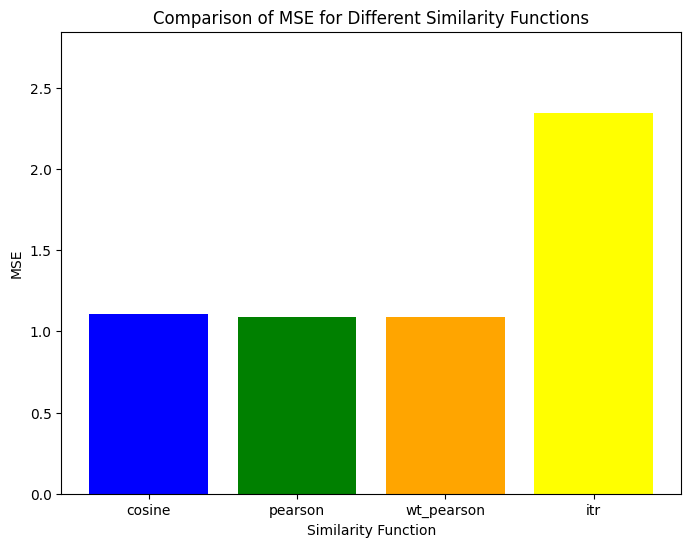

In [63]:
import matplotlib.pyplot as plt

# RMSE values for different similarity functions
similarity_functions = ['cosine', 'pearson','wt_pearson', 'itr']
mse_values = [mse, pearson_mse ,wtpearson_mse, triangle_mse]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(similarity_functions, mse_values, color=['blue', 'green', 'orange','yellow'])
plt.xlabel('Similarity Function')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Different Similarity Functions')
plt.ylim(0, max(mse_values) + 0.5)
plt.show()


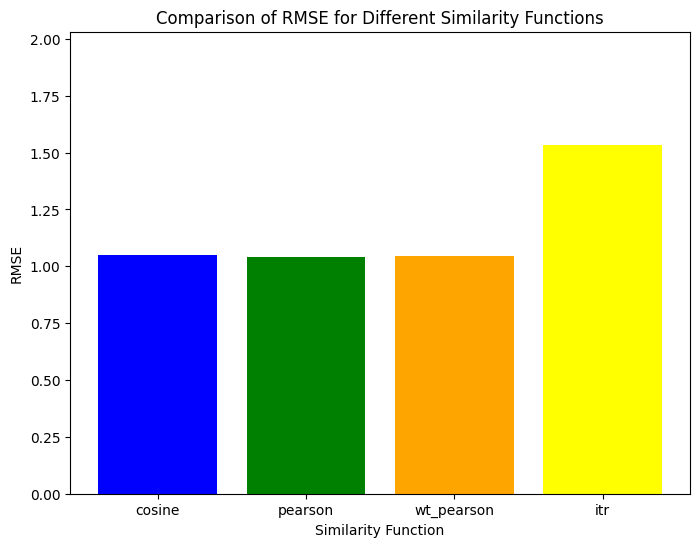

In [64]:
import matplotlib.pyplot as plt

# RMSE values for different similarity functions
similarity_functions = ['cosine', 'pearson','wt_pearson', 'itr']
rmse_values = [rmse, pearson_rmse ,wtpearson_rmse, triangle_rmse]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(similarity_functions, rmse_values, color=['blue', 'green', 'orange','yellow'])
plt.xlabel('Similarity Function')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Similarity Functions')
plt.ylim(0, max(rmse_values) + 0.5)
plt.show()


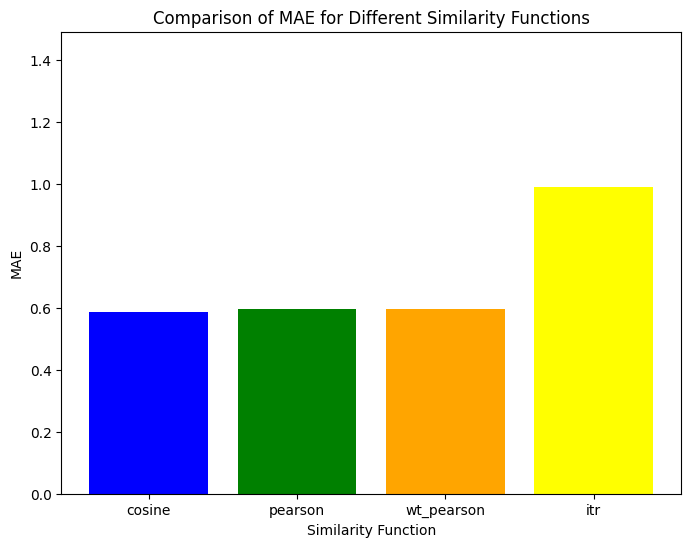

In [65]:
import matplotlib.pyplot as plt

# RMSE values for different similarity functions
similarity_functions = ['cosine', 'pearson','wt_pearson', 'itr']
mae_values = [mae, pearson_mae ,wtpearson_mae, triangle_mae]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(similarity_functions, mae_values, color=['blue', 'green', 'orange','yellow'])
plt.xlabel('Similarity Function')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Similarity Functions')
plt.ylim(0, max(mae_values) + 0.5)
plt.show()
